# SMS/E-mail Spam Detection

## Importing Necessary Libraries/Modules

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier

from xgboost import XGBClassifier
from wordcloud import WordCloud

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the Dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [8]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

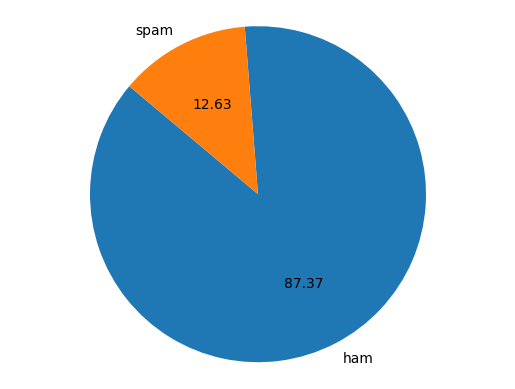

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f', startangle=140)
plt.axis('equal')  
plt.show()

In [18]:
df['num_characters'] = df['text'].apply(len)

In [19]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
twt = TweetTokenizer()
df['num_words'] = df['text'].apply(lambda x: len(twt.tokenize(x)))

In [21]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,40
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [22]:
tokenizer = PunktSentenceTokenizer()
df['num_sentences'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

In [23]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,1
1,0,Ok lar... Joking wif u oni...,29,8,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,40,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,26,1


In [24]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.106790,1.919714
std,58.236293,12.985979,1.428215
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,188.000000,38.000000


In [25]:
# for ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.420283,1.767715
std,56.358207,12.731283,1.353829
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,12.000000,1.000000
75%,90.000000,21.000000,2.000000
max,910.000000,188.000000,38.000000


In [26]:
# for spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,29.770291,2.970904
std,30.137753,7.635840,1.486363
min,13.000000,2.000000,1.000000
25%,132.000000,27.000000,2.000000
50%,149.000000,31.000000,3.000000
75%,157.000000,35.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: ylabel='Frequency'>

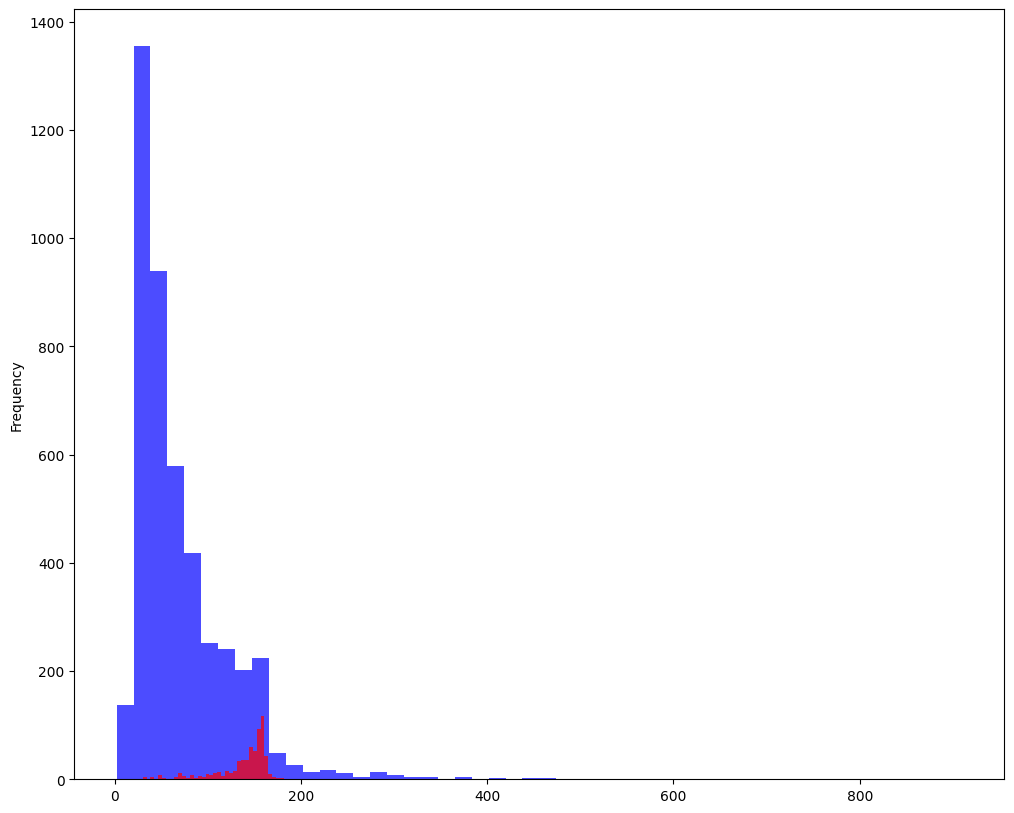

In [27]:
plt.figure(figsize=(12, 10))
df[df['target'] == 0]['num_characters'].plot(kind='hist', bins=50, color='blue', alpha=0.7, label='Ham')
df[df['target'] == 1]['num_characters'].plot(kind='hist', bins=50, color='red', alpha=0.7, label='Spam')

<Axes: ylabel='Frequency'>

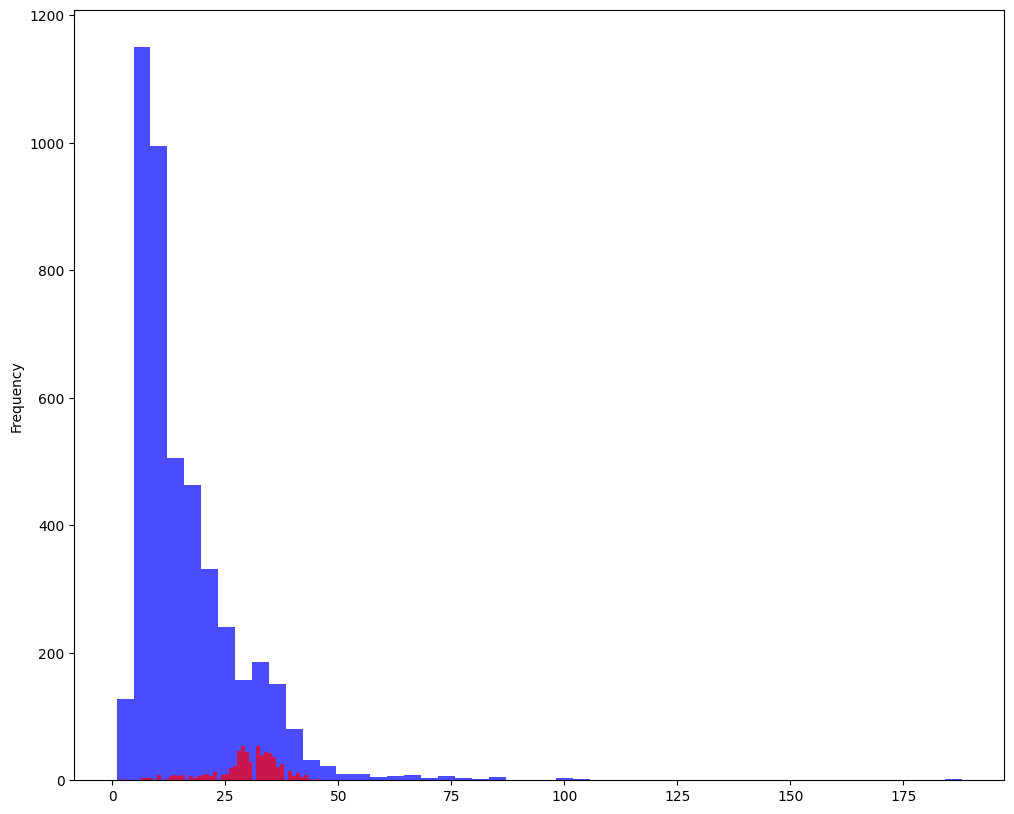

In [28]:
plt.figure(figsize=(12, 10))
df[df['target'] == 0]['num_words'].plot(kind='hist', bins=50, color='blue', alpha=0.7, label='Ham')
df[df['target'] == 1]['num_words'].plot(kind='hist', bins=50, color='red', alpha=0.7, label='Spam')

<Axes: ylabel='Frequency'>

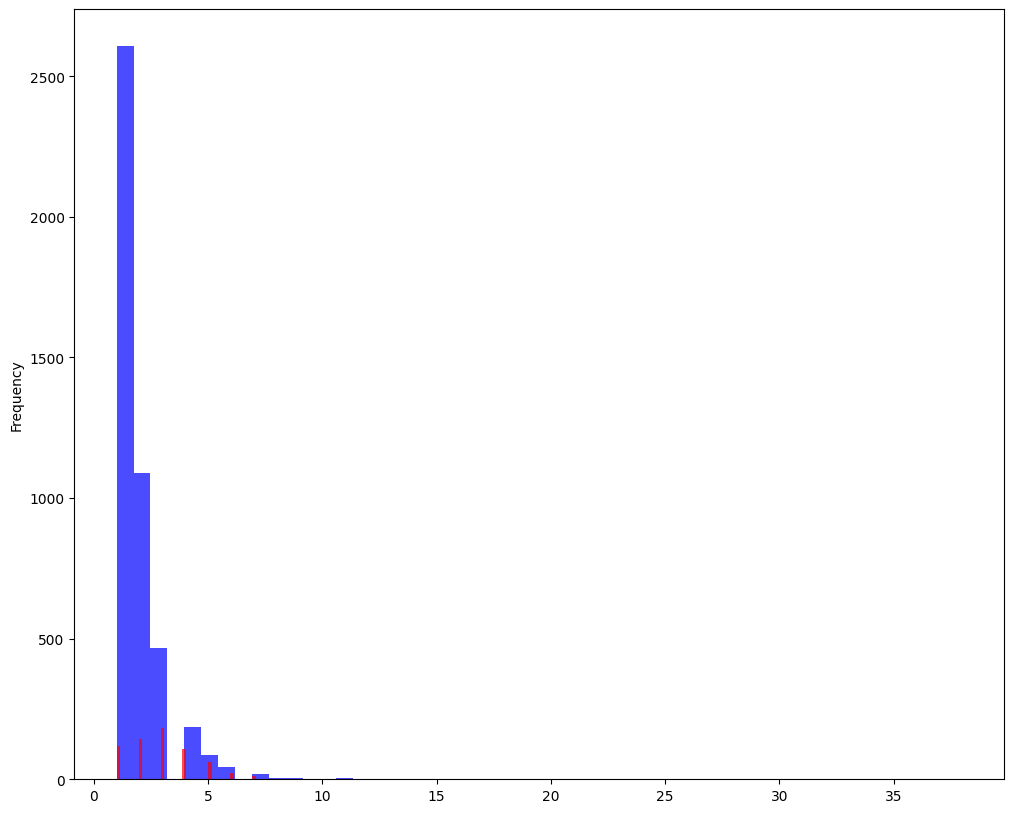

In [29]:
plt.figure(figsize=(12, 10))
df[df['target'] == 0]['num_sentences'].plot(kind='hist', bins=50, color='blue', alpha=0.7, label='Ham')
df[df['target'] == 1]['num_sentences'].plot(kind='hist', bins=50, color='red', alpha=0.7, label='Spam')

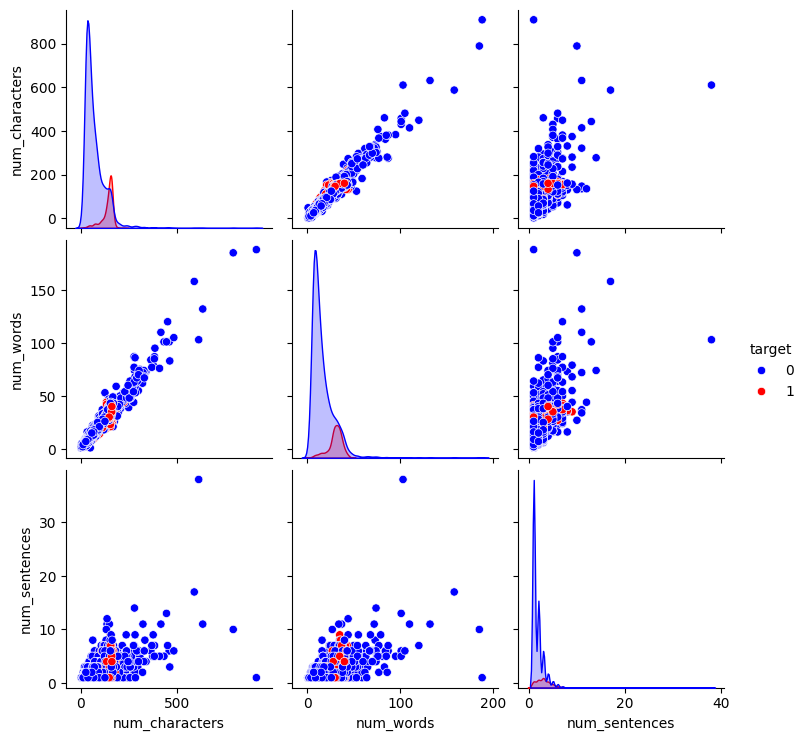

In [30]:
sns.pairplot(df, hue='target', vars=['num_characters', 'num_words', 'num_sentences'], palette={0: 'blue', 1: 'red'})

<Axes: >

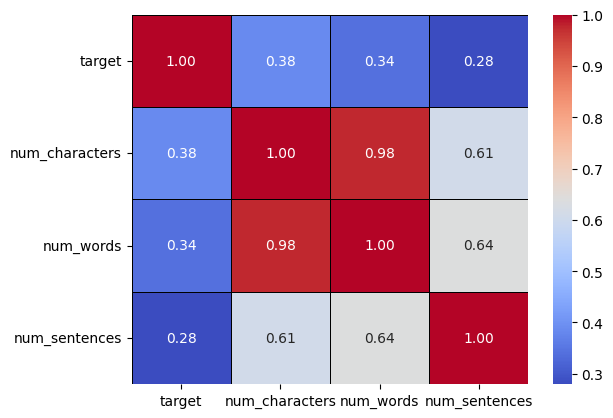

In [31]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

## Data Preprocessing

In [32]:
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = twt.tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [33]:
transform_text("Hi How Are You @user? I hope you are doing well. # hashtag . I would love to hear more from you.")

'hi hope well hashtag would love hear'

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,40,4,2nd time tri 2 contact u u å 750 pound prize 2...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,guy bitch act like interest buy someth els nex...


In [36]:
wc = WordCloud(width=500, height=500, background_color='black', max_words=100, random_state=42)

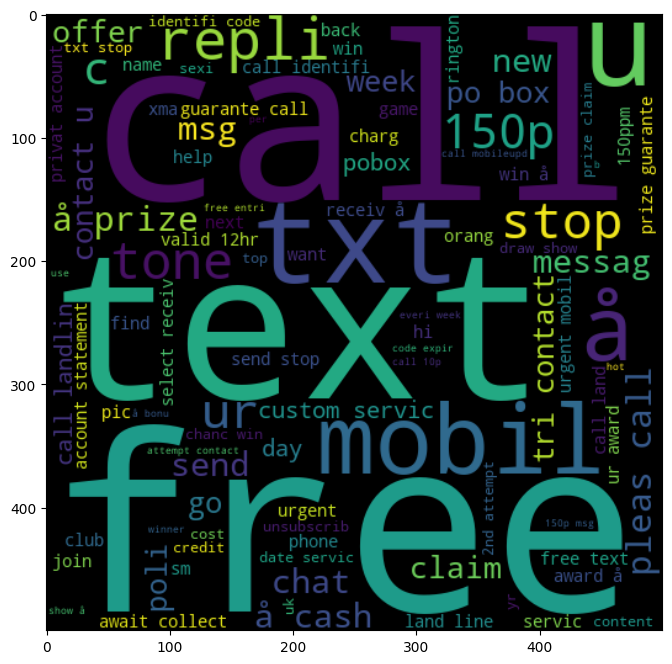

In [37]:
wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')

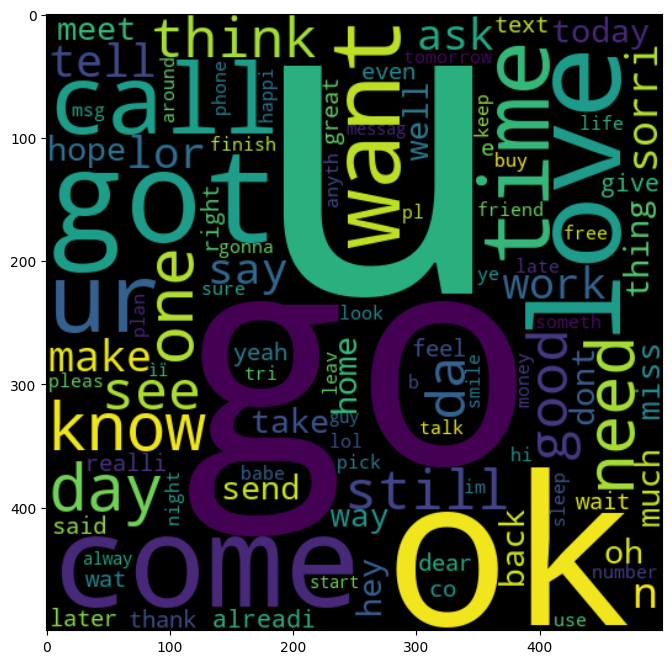

In [38]:
wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')

In [39]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word) 

In [40]:
len(spam_corpus)

11226

<Axes: xlabel='Frequency', ylabel='Word'>

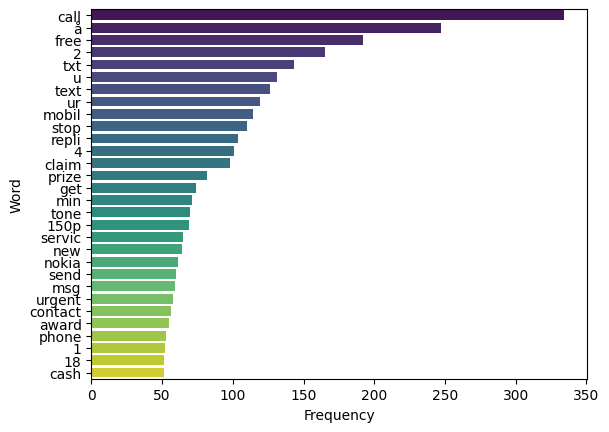

In [41]:
dataframe1 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=dataframe1, palette='viridis')

In [42]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

34992

<Axes: xlabel='Frequency', ylabel='Word'>

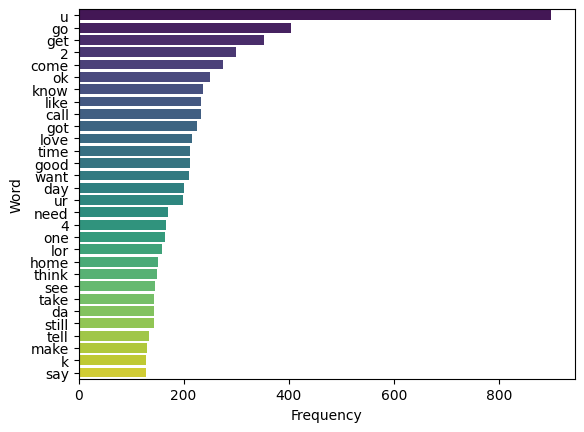

In [44]:
dataframe2 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=dataframe2, palette='viridis')

## Model Building

### Making Objects of Algorithm Classes

In [45]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state=42)

### Creating a Dictionary

In [46]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb 
}

### Checking with CountVectorizer()

In [47]:
cv = CountVectorizer()

In [48]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5169, 6875)

In [50]:
y = df['target'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8713733075435203
[[774 115]
 [ 18 127]]
0.5247933884297521


In [53]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9738878143133463
[[873  16]
 [ 11 134]]
0.8933333333333333


In [54]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[886   3]
 [ 28 117]]
0.975


### Checking with TfidfVectorizer()

In [ ]:
tfidf = TfidfVectorizer()

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 6875)

In [58]:
y = df['target'].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8684719535783365
[[774 115]
 [ 21 124]]
0.5188284518828452


In [61]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9622823984526112
[[889   0]
 [ 39 106]]
1.0


In [62]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[886   3]
 [ 28 117]]
0.975


### Function to Predict Accuracy and Precision Score

In [63]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

### Training Various Models

In [64]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9709864603481625, 0.952755905511811)

In [66]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"{name} - Accuracy: {current_accuracy}, Precision: {current_precision}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

SVC - Accuracy: 0.9709864603481625, Precision: 0.952755905511811
KN - Accuracy: 0.8945841392649904, Precision: 1.0
NB - Accuracy: 0.9622823984526112, Precision: 1.0
DT - Accuracy: 0.9410058027079303, Precision: 0.875
LR - Accuracy: 0.9458413926499033, Precision: 0.8869565217391304
RF - Accuracy: 0.9661508704061895, Precision: 1.0
AdaBoost - Accuracy: 0.9187620889748549, Precision: 0.8210526315789474
BgC - Accuracy: 0.9671179883945842, Precision: 0.937007874015748
ETC - Accuracy: 0.9738878143133463, Precision: 1.0
GBDT - Accuracy: 0.9497098646034816, Precision: 0.9696969696969697
xgb - Accuracy: 0.9748549323017408, Precision: 0.968503937007874


In [67]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores,'Precision': precision_scores})

In [68]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.970986,0.952756
1,KN,0.894584,1.000000
2,NB,0.962282,1.000000
3,DT,0.941006,0.875000
4,LR,0.945841,0.886957
5,RF,0.966151,1.000000
6,AdaBoost,0.918762,0.821053
7,BgC,0.967118,0.937008
8,ETC,0.973888,1.000000
9,GBDT,0.949710,0.969697


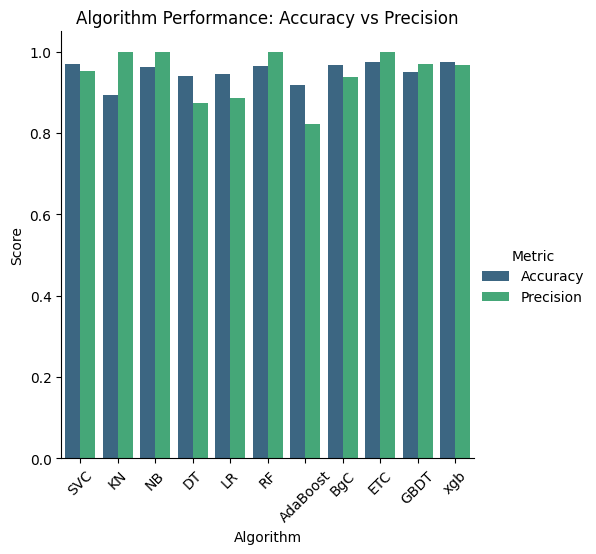

<Figure size 1200x600 with 0 Axes>

In [ ]:
performance_df.rename(columns={'# Accuracy': 'Accuracy', '# Precision': 'Precision'}, inplace=True)
melted_df = pd.melt(performance_df, id_vars='Algorithm', value_vars=['Accuracy', 'Precision'],var_name='Metric', value_name='Score')
sns.catplot(x='Algorithm', y='Score', hue='Metric', data=melted_df, kind='bar', palette='viridis')
plt.xticks(rotation=45)
plt.title('Algorithm Performance: Accuracy vs Precision')
plt.figure(figsize=(12, 6))
plt.show()